In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import cycle
%matplotlib inline
import numpy as np
import pandas as pd
pd.set_option('max_rows',1000)
import os
from qvalue import estimate
from glob import iglob

/Users/mikesivley/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [2]:
# Load the ExAC nsSNV results
ns  = pd.read_csv("/Volumes/sivleyrm/pdbmap/results/specialK_analysis_2016-05-27/exac/daf_K_summary.txt",delimiter='\t')
ns  = ns.drop_duplicates(["structid","chain"])
ns.ix[~ns[ "Kp"].isnull(), "Kq"], K_lam, K_pi = estimate(ns.ix[~ns[ "Kp"].isnull(), "Kp"].values)
ns.ix[~ns["wKp"].isnull(),"wKq"],wK_lam,wK_pi = estimate(ns.ix[~ns["wKp"].isnull(),"wKp"].values)

In [3]:
# Load the ExAC sSNV results
syn = pd.read_csv("/Volumes/sivleyrm/pdbmap/results/specialK_analysis_2016-05-27/synonymous/daf_K_summary.txt",delimiter='\t')
syn = syn.drop_duplicates(["structid","chain"])
syn.ix[~syn[ "Kp"].isnull(), "Kq"], K_lam, K_pi = estimate(syn.ix[~syn[ "Kp"].isnull(), "Kp"].values)
syn.ix[~syn["wKp"].isnull(),"wKq"],wK_lam,wK_pi = estimate(syn.ix[~syn["wKp"].isnull(),"wKp"].values)

In [4]:
# Load the ClinVar pathogenic results
cv  = pd.read_csv("/Volumes/sivleyrm/pdbmap/results/specialK_analysis_2016-05-06/clinvar/pathogenic_K_summary.txt",delimiter='\t')
cv  = cv.drop_duplicates(["structid","chain"])
cv.ix[~cv[ "Kp"].isnull(), "Kq"], K_lam, K_pi = estimate(cv.ix[~cv[ "Kp"].isnull(), "Kp"].values)

In [5]:
# Load the COSMIC somatic results
csm = pd.read_csv("/Volumes/sivleyrm/pdbmap/results/specialK_analysis_2016-05-17/cosmic/recurrence_K_summary.txt",delimiter='\t')
csm = csm.drop_duplicates(["structid","chain"])
csm.ix[~csm[ "Kp"].isnull(), "Kq"], K_lam, K_pi = estimate(csm.ix[~csm[ "Kp"].isnull(), "Kp"].values)
csm.ix[~csm["wKp"].isnull(),"wKq"],wK_lam,wK_pi = estimate(csm.ix[~csm["wKp"].isnull(),"wKp"].values)

/Users/mikesivley/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/mikesivley/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/mikesivley/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pand

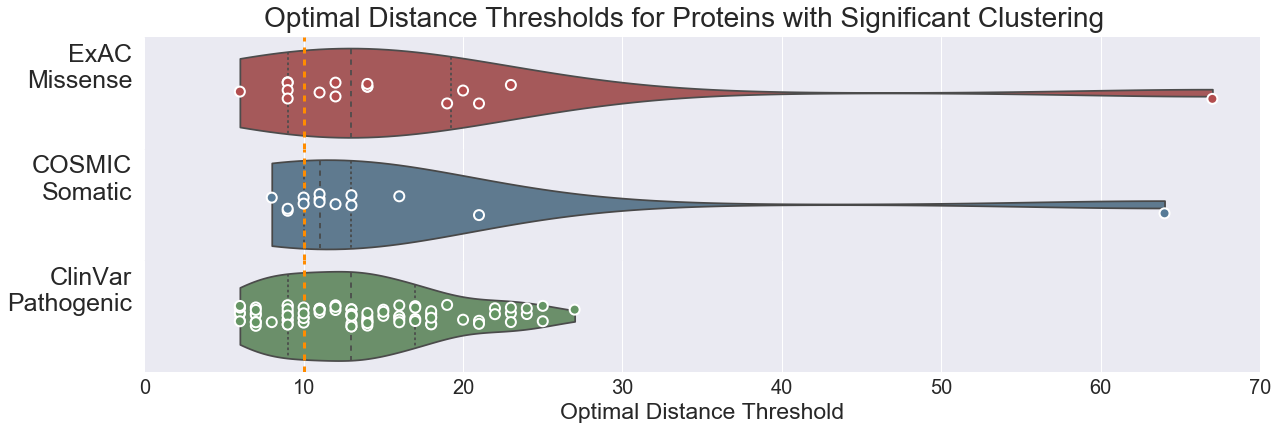

In [7]:
# Setup the plot
fig,ax = plt.subplots(3,1,figsize=(20,6),sharex=True,facecolor='white')
plt.subplots_adjust(wspace=0, hspace=0)
pal = list(sns.color_palette("Set1", n_colors=4, desat=.5))

# Plot the FDR-significant K for ExAC nsSNVs
df = ns[(ns["Kq"]<0.1) & (ns["Kz"]>0)]
df['dummy'] = ''
sns.violinplot(x='T',y='dummy',data=df,inner='quart',color=pal[0],scale='width',cut=0,ax=ax[0])
sns.stripplot(x='T',y='dummy',data=df,jitter=True,lw=2,color=pal[0],orient='h',edgecolor='white',size=10,ax=ax[0])
ax[0].set_ylabel("ExAC\nMissense",fontsize=25,rotation='horizontal',ha='right')
handles, labels = ax[0].get_legend_handles_labels()
ax[0].legend(fontsize=20,handles=handles[:2])

# Plot the FDR-significant K for COSMIC somatic nsSNVs
df = csm[(csm["Kq"]<0.1) & (csm["Kz"]>0)]
df['dummy'] = ''
sns.violinplot(x='T',y='dummy',data=df,inner='quart',color=pal[1],scale='width',cut=0,ax=ax[1])
sns.stripplot(x='T',y='dummy',data=df,jitter=True,lw=2,color=pal[1],orient='h',edgecolor='white',size=10,ax=ax[1])
ax[1].set_ylabel("COSMIC\nSomatic",fontsize=25,rotation='horizontal',ha='right')
handles, labels = ax[1].get_legend_handles_labels()
ax[1].legend(fontsize=20,handles=handles[:2])

# Plot the FDR-significant K for ClinVar pathogenic nsSNVs
df = cv[(cv["Kq"]<0.1) & (cv["Kz"]>0)]
df['dummy'] = ''
sns.violinplot(x='T',y='dummy',data=df,inner='quart',color=pal[2],scale='width',cut=0,ax=ax[2])
sns.stripplot(x='T',y='dummy',data=df,jitter=True,lw=2,color=pal[2],orient='h',edgecolor='white',size=10,ax=ax[2])
ax[2].set_ylabel("ClinVar\nPathogenic",fontsize=25,rotation='horizontal',ha='right')
handles, labels = ax[2].get_legend_handles_labels()
ax[2].legend(fontsize=20,handles=handles[:2])

plt.rcParams['xtick.labelsize'] = 20
plt.xlabel("Optimal Distance Threshold",fontsize=23)
for x in ax:
    x.axvline(x=10,c='darkorange',ls='dashed',lw=3)
plt.xlim([0,70])
plt.suptitle("Optimal Distance Thresholds for Proteins with Significant Clustering",fontsize=28,y=0.97)
plt.show()

In [12]:
print len(ns.ix[(ns["Kq"]<0.1) & (ns["Kz"]>0),"Kz"])
print len(csm.ix[(csm["Kq"]<0.1) & (csm["Kz"]>0),"Kz"])
print len(cv.ix[(cv["Kq"]<0.1) & (cv["Kz"]>0),"Kz"])

16
14
88


In [10]:
from scipy.stats import mannwhitneyu
print "Mann-Whitney U Comparisons"
u,p = mannwhitneyu(ns.ix[(ns["Kq"]<0.1) & (ns["Kz"]>0),"Kz"],csm.ix[(csm["Kq"]<0.1) & (csm["Kz"]>0),"Kz"])
print "Nonsynonymous-COSMIC:      p = %4.2g"%p
u,p = mannwhitneyu(ns.ix[(ns["Kq"]<0.1) & (ns["Kz"]>0),"Kz"],cv.ix[(cv["Kq"]<0.1) & (cv["Kz"]>0),"Kz"])
print "Nonsynonymous-ClinVar:     p = %4.2g"%p
u,p = mannwhitneyu(csm.ix[(csm["Kq"]<0.1) & (csm["Kz"]>0),"Kz"],cv.ix[(cv["Kq"]<0.1) & (cv["Kz"]>0),"Kz"])
print "COSMIC-ClinVar:            p = %4.2g"%p

Mann-Whitney U Comparisons
Nonsynonymous-COSMIC:      p = 0.092
Nonsynonymous-ClinVar:     p = 0.00041
COSMIC-ClinVar:            p = 1.1e-05


In [86]:
print ns.ix[(ns["Kq"]<0.1) & (ns["T"]>60),["structid","chain"]]

     structid chain
4496     2Q7Z     A


In [66]:
print "Optimal Threshold Medians:"
print "ExAC:    %2d"%ns.ix[(ns["Kq"]<0.1)  & (ns["Kz"]>0),"T"].median()
print "COSMIC:  %2d"%csm.ix[(csm["Kq"]<0.1) & (csm["Kz"]>0),"T"].median()
print "ClinVar: %2d"%cv.ix[(cv["Kq"]<0.1)  & (cv["Kz"]>0),"T"].median()

Optimal Threshold Medians:
ExAC:    13
COSMIC:  11
ClinVar: 13


In [61]:
print "Proportion of Optimal Thresholds > 10 Angstroms:"
print "ExAC:    %.2f"%(((ns["Kq"]<0.1) & (ns["Kz"]>0) & (ns["T"]>10.)).sum()/float(((ns["Kq"]<0.1) & (ns["Kz"]>0)).sum()))
print "COSMIC:  %.2f"%(((csm["Kq"]<0.1) & (csm["Kz"]>0) & (csm["T"]>10.)).sum()/float(((csm["Kq"]<0.1) & (csm["Kz"]>0)).sum()))
print "ClinVar: %.2f"%(((cv["Kq"]<0.1) & (cv["Kz"]>0) & (cv["T"]>10.)).sum()/float(((cv["Kq"]<0.1) & (cv["Kz"]>0)).sum()))

Proportion of Optimal Thresholds > 10 Angstroms:
ExAC:    0.69
COSMIC:  0.64
ClinVar: 0.65


In [70]:
# Wilcoxon Rank Sum test
from scipy.stats import mannwhitneyu
print "Mann-Whitney U Tests for Optimal Distance Threshold Distributions:\n"

u,p = mannwhitneyu(ns.ix[(ns["Kq"]<0.1) & (ns["Kz"]>0),"T"],csm.ix[(csm["Kq"]<0.1) & (csm["Kz"]>0),"T"])
print "ExAC-COSMIC:    U=%6.1f p=%.3g"%(u,p)

u,p = mannwhitneyu(ns.ix[(ns["Kq"]<0.1) & (ns["Kz"]>0),"T"],cv.ix[(cv["Kq"]<0.1) & (cv["Kz"]>0),"T"])
print "ExAC-ClinVar:   U=%6.1f p=%.3g"%(u,p)

u,p = mannwhitneyu(csm.ix[(csm["Kq"]<0.1) & (csm["Kz"]>0),"T"],cv.ix[cv["Kq"]<0.1,"T"])
print "COSMIC-Clinvar: U=%6.1f p=%.3g"%(u,p)

Mann-Whitney U Tests for Optimal Distance Threshold Distributions:

ExAC-COSMIC:    U= 128.0 p=0.517
ExAC-ClinVar:   U= 750.5 p=0.678
COSMIC-Clinvar: U= 567.0 p=0.636
